In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
raw_data = pd.read_csv('train_FD001.txt', sep=' ', header=None)
raw_data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [4]:
raw_data = raw_data.drop([26,27], axis='columns')

In [5]:
raw_data.columns = ['ID', 'Cycle', 'OperSet1','OperSet2','OperSet3', 'Sensor1', 'Sensor2','Sensor3', 'Sensor4', 'Sensor5','Sensor6', 'Sensor7','Sensor8', 'Sensor9', 'Sensor10', 'Sensor11', 'Sensor12','Sensor13', 'Sensor14', 'Sensor15','Sensor16', 'Sensor17','Sensor18', 'Sensor19', 'Sensor20','Sensor21']
raw_data

,ID,Cycle,OperSet1,OperSet2,OperSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [6]:
raw_data[raw_data['ID'] == 3]

,ID,Cycle,OperSet1,OperSet2,OperSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21
479,3,1,0.0008,0.0005,100.0,518.67,642.04,1584.20,1398.13,14.62,...,522.24,2388.00,8138.40,8.4207,0.03,391,2388,100.0,38.96,23.3205
480,3,2,-0.0010,0.0000,100.0,518.67,642.66,1587.04,1398.62,14.62,...,522.03,2388.01,8137.38,8.3949,0.03,390,2388,100.0,39.07,23.4369
481,3,3,0.0013,-0.0002,100.0,518.67,642.07,1580.75,1401.10,14.62,...,522.16,2388.01,8137.20,8.3820,0.03,393,2388,100.0,39.03,23.3162
482,3,4,0.0008,-0.0002,100.0,518.67,642.50,1580.12,1395.76,14.62,...,522.31,2388.07,8139.35,8.3940,0.03,391,2388,100.0,38.94,23.4901
483,3,5,0.0020,0.0004,100.0,518.67,641.97,1581.48,1394.05,14.62,...,522.00,2388.03,8135.99,8.4233,0.03,391,2388,100.0,38.90,23.4190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,3,175,-0.0030,0.0004,100.0,518.67,643.15,1603.74,1424.17,14.62,...,520.34,2388.14,8238.86,8.5066,0.03,396,2388,100.0,38.49,22.9909
654,3,176,-0.0008,0.0002,100.0,518.67,643.93,1595.61,1438.51,14.62,...,520.91,2388.12,8251.82,8.5245,0.03,396,2388,100.0,38.49,23.0656
655,3,177,-0.0041,-0.0002,100.0,518.67,643.68,1601.21,1423.50,14.62,...,520.19,2388.16,8249.86,8.5286,0.03,397,2388,100.0,38.37,23.0336
656,3,178,-0.0010,0.0001,100.0,518.67,643.66,1606.50,1430.55,14.62,...,520.14,2388.12,8253.84,8.5351,0.03,399,2388,100.0,38.57,23.1323


In [7]:
EOL=[]
for sl_no in raw_data['ID']:
        EOL.append( ((raw_data[raw_data['ID'] == sl_no]["Cycle"]).values)[-1])

In [8]:
EOL

[192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192

In [9]:
raw_data["EOL"]=EOL

In [10]:
raw_data

,ID,Cycle,OperSet1,OperSet2,OperSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,EOL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200


Classification

In [11]:
raw_data["LR"] = raw_data["Cycle"].div(raw_data["EOL"])
raw_data

,ID,Cycle,OperSet1,OperSet2,OperSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,EOL,LR
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,0.005208
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,0.010417
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,0.015625
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,0.020833
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,0.026042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200,0.980000
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200,0.985000
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200,0.990000
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200,0.995000


In [12]:
raw_data=raw_data.drop(columns=['ID','EOL'])
raw_data

,Cycle,OperSet1,OperSet2,OperSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,...,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,LR
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0.005208
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0.010417
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0.015625
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0.020833
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0.026042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,0.980000
20627,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,0.985000
20628,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,0.990000
20629,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,0.995000


In [13]:
labels = []
for i in range(0, len(raw_data)):
    if np.array(raw_data["LR"])[i] <= 0.6:
        labels.append(0)
    elif np.array(raw_data["LR"])[i] <= 0.8:
        labels.append(1)
    else:
        labels.append(2)

raw_data["labels"] = labels
raw_data = raw_data.drop(columns=['LR'])

In [14]:
raw_data

,Cycle,OperSet1,OperSet2,OperSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,...,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,labels
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,2
20627,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,2
20628,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,2


training

In [15]:
raw_data.to_csv('Training_1_all_features.csv',index=None)

In [16]:
raw_data = pd.read_csv('train_FD002.txt', sep=' ', header=None)
raw_data = raw_data.drop([26,27], axis='columns')
raw_data.columns = ['ID', 'Cycle', 'OperSet1','OperSet2','OperSet3', 'Sensor1', 'Sensor2','Sensor3', 'Sensor4', 'Sensor5','Sensor6', 'Sensor7','Sensor8', 'Sensor9', 'Sensor10', 'Sensor11', 'Sensor12','Sensor13', 'Sensor14', 'Sensor15','Sensor16', 'Sensor17','Sensor18', 'Sensor19', 'Sensor20','Sensor21']



In [17]:
EOL=[]
for sl_no in raw_data['ID']:
        EOL.append( ((raw_data[raw_data['ID'] == sl_no]["Cycle"]).values)[-1])

        

In [18]:

raw_data["EOL"]=EOL

In [19]:
raw_data["LR"] = raw_data["Cycle"].div(raw_data["EOL"])
   

In [20]:
raw_data=raw_data.drop(columns=['ID','EOL'])

In [21]:
 labels = []
for i in range(0, len(raw_data)):
    if np.array(raw_data["LR"])[i] <= 0.6:
        labels.append(0)
    elif np.array(raw_data["LR"])[i] <= 0.8:
        labels.append(1)
    else:
        labels.append(2)

raw_data["labels"] = labels
raw_data = raw_data.drop(columns=['LR'])
raw_data

,Cycle,OperSet1,OperSet2,OperSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,...,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,labels
0,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,8.00,...,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,0
1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,5.71,...,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,0
2,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,9.02,...,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,0
3,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,5.71,...,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,0
4,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,9.03,...,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,13.66,...,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189,2
53755,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,15.50,...,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454,2
53756,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,9.04,...,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503,2
53757,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,9.04,...,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729,2


In [22]:
raw_data.to_csv('Training_2_all_features.csv',index=None)

In [23]:
raw_data = pd.read_csv('train_FD003.txt', sep=' ', header=None)
raw_data = raw_data.drop([26,27], axis='columns')
raw_data.columns = ['ID', 'Cycle', 'OperSet1','OperSet2','OperSet3', 'Sensor1', 'Sensor2','Sensor3', 'Sensor4', 'Sensor5','Sensor6', 'Sensor7','Sensor8', 'Sensor9', 'Sensor10', 'Sensor11', 'Sensor12','Sensor13', 'Sensor14', 'Sensor15','Sensor16', 'Sensor17','Sensor18', 'Sensor19', 'Sensor20','Sensor21']

In [24]:
EOL=[]
for sl_no in raw_data['ID']:
        EOL.append( ((raw_data[raw_data['ID'] == sl_no]["Cycle"]).values)[-1])

In [25]:

raw_data["EOL"]=EOL

In [26]:
raw_data["LR"] = raw_data["Cycle"].div(raw_data["EOL"])

In [27]:
raw_data=raw_data.drop(columns=['ID','EOL'])

In [28]:
 labels = []
for i in range(0, len(raw_data)):
    if np.array(raw_data["LR"])[i] <= 0.6:
        labels.append(0)
    elif np.array(raw_data["LR"])[i] <= 0.8:
        labels.append(1)
    else:
        labels.append(2)

raw_data["labels"] = labels
raw_data = raw_data.drop(columns=['LR'])


In [29]:
raw_data.to_csv('Training_3_all_features.csv',index=None)

In [30]:
raw_data = pd.read_csv('train_FD004.txt', sep=' ', header=None)
raw_data = raw_data.drop([26,27], axis='columns')
raw_data.columns = ['ID', 'Cycle', 'OperSet1','OperSet2','OperSet3', 'Sensor1', 'Sensor2','Sensor3', 'Sensor4', 'Sensor5','Sensor6', 'Sensor7','Sensor8', 'Sensor9', 'Sensor10', 'Sensor11', 'Sensor12','Sensor13', 'Sensor14', 'Sensor15','Sensor16', 'Sensor17','Sensor18', 'Sensor19', 'Sensor20','Sensor21']


In [31]:
EOL=[]
for sl_no in raw_data['ID']:
        EOL.append( ((raw_data[raw_data['ID'] == sl_no]["Cycle"]).values)[-1])

In [32]:
raw_data["EOL"]=EOL

In [33]:
raw_data["LR"] = raw_data["Cycle"].div(raw_data["EOL"])

In [34]:
raw_data=raw_data.drop(columns=['ID','EOL'])

In [35]:
 labels = []
for i in range(0, len(raw_data)):
    if np.array(raw_data["LR"])[i] <= 0.6:
        labels.append(0)
    elif np.array(raw_data["LR"])[i] <= 0.8:
        labels.append(1)
    else:
        labels.append(2)

raw_data["labels"] = labels
raw_data = raw_data.drop(columns=['LR'])

In [36]:
raw_data.to_csv('Training_4_all_features.csv',index=None)

In [37]:
df1 = pd.read_csv('Training_1_all_features.csv')
df2 = pd.read_csv('Training_2_all_features.csv')
df3 = pd.read_csv('Training_3_all_features.csv')
df4 = pd.read_csv('Training_4_all_features.csv')

In [38]:
df = pd.concat([df1,df2,df3,df4])

In [39]:
df

,Cycle,OperSet1,OperSet2,OperSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,...,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,labels
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,15.46,...,2388.73,8185.69,8.4541,0.03,372,2319,100.0,29.11,17.5234,2
61245,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,21.57,...,2388.46,8185.47,8.2221,0.03,396,2388,100.0,39.38,23.7151,2
61246,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,21.57,...,2388.48,8193.94,8.2525,0.03,395,2388,100.0,39.78,23.8270,2
61247,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,7.96,...,2388.83,8125.64,9.0515,0.02,337,2223,100.0,15.26,9.0774,2


In [40]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

Training a Random Forest Model

In [42]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

Performance on Validation Set

0.8933649289099526

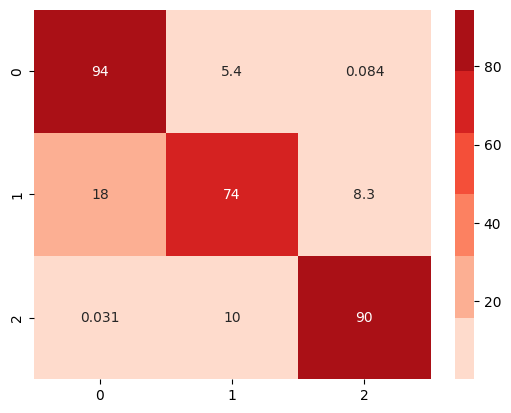

In [43]:
y_pred_RF = RF.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_RF, normalize = 'true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_test, y_pred_RF)

In [44]:
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

1.0

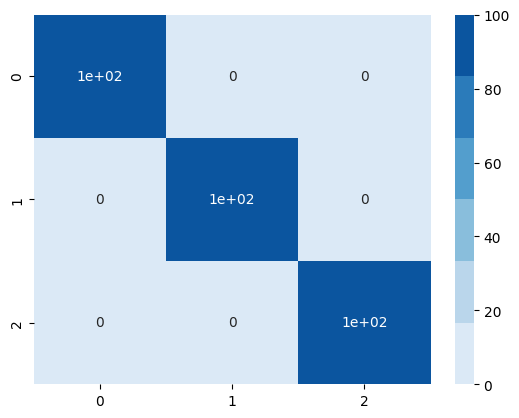

In [45]:
y_pred_RF = RF.predict(X_train)

cm = pd.DataFrame(confusion_matrix(y_train, y_pred_RF, normalize ='true')*100)
colormap = sns.color_palette("Blues")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_train, y_pred_RF)

Randomized Search with cross validation for Hyperparameter optimization

In [46]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[200, 400, 300]
max_depth= [10, 20, 30]
max_samples= [0.2,0.3,0.4]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_samples': max_samples}
print(random_grid)

{'n_estimators': [200, 400, 300], 'max_depth': [10, 20, 30], 'max_samples': [0.2, 0.3, 0.4]}


In [47]:
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3,n_jobs=-1)
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_samples': [0.2, 0.3, 0.4],
                                        'n_estimators': [200, 400, 300]})

In [48]:
rf_random.best_params_

{'n_estimators': 200, 'max_samples': 0.4, 'max_depth': 30}

In [49]:
rf_random.best_score_

0.8900383109152058

0.8927413320029932

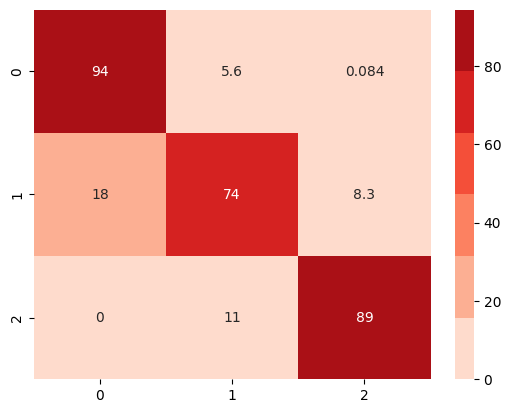

In [50]:
RF_randSer = RandomForestClassifier(n_estimators=300,max_samples=0.4,max_depth=20)
RF_randSer.fit(X_train, y_train)
y_pred_RF = RF_randSer.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_RF, normalize ='true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_test, y_pred_RF)

Testing on given Test-Dataset

In [51]:
raw_data = pd.read_csv('test_FD001.txt', sep=' ', header=None)
raw_data = raw_data.drop([26,27], axis='columns')
raw_data.columns = ['ID', 'Cycle', 'OperSet1','OperSet2','OperSet3', 'Sensor1', 'Sensor2','Sensor3', 'Sensor4', 'Sensor5','Sensor6', 'Sensor7','Sensor8', 'Sensor9', 'Sensor10', 'Sensor11', 'Sensor12','Sensor13', 'Sensor14', 'Sensor15','Sensor16', 'Sensor17','Sensor18', 'Sensor19', 'Sensor20','Sensor21']
raw_data

,ID,Cycle,OperSet1,OperSet2,OperSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [52]:
given_no_of_cycles = []

for i in range(1, len(raw_data['ID'].unique()) + 1):
    given_no_of_cycles.append(len(raw_data[raw_data['ID'] == i]))
    print(len(raw_data[raw_data['ID'] == i]))

given_no_of_cycles = np.array(given_no_of_cycles).reshape([len(given_no_of_cycles), 1])


31
49
126
106
98
105
160
166
55
192
83
217
195
46
76
113
165
133
135
184
148
39
130
186
48
76
140
158
171
143
196
145
50
203
198
126
121
125
37
133
123
156
172
54
152
146
73
78
303
74
144
189
164
121
113
136
160
176
94
147
159
232
155
168
71
147
71
187
54
152
68
131
112
137
88
205
162
72
101
133
213
162
73
172
34
110
56
68
177
146
234
150
244
133
89
97
134
121
97
198


In [53]:
len(raw_data['ID'].unique())

100

In [54]:
cycle_ran_after = pd.read_csv('RUL_FD001.txt', sep=' ',header = None)
cycle_ran_after=cycle_ran_after.drop([1], axis='columns')
cycle_ran_after = np.array(cycle_ran_after)
cycle_ran_after

array([[112],
       [ 98],
       [ 69],
       [ 82],
       [ 91],
       [ 93],
       [ 91],
       [ 95],
       [111],
       [ 96],
       [ 97],
       [124],
       [ 95],
       [107],
       [ 83],
       [ 84],
       [ 50],
       [ 28],
       [ 87],
       [ 16],
       [ 57],
       [111],
       [113],
       [ 20],
       [145],
       [119],
       [ 66],
       [ 97],
       [ 90],
       [115],
       [  8],
       [ 48],
       [106],
       [  7],
       [ 11],
       [ 19],
       [ 21],
       [ 50],
       [142],
       [ 28],
       [ 18],
       [ 10],
       [ 59],
       [109],
       [114],
       [ 47],
       [135],
       [ 92],
       [ 21],
       [ 79],
       [114],
       [ 29],
       [ 26],
       [ 97],
       [137],
       [ 15],
       [103],
       [ 37],
       [114],
       [100],
       [ 21],
       [ 54],
       [ 72],
       [ 28],
       [128],
       [ 14],
       [ 77],
       [  8],
       [121],
       [ 94],
       [118],
      

MAKING EOL

In [55]:
EOL = []
i = 0

for i in raw_data['ID']:
    EOL.append(given_no_of_cycles[i-1] + cycle_ran_after[i-1])

EOL = np.array(EOL).reshape([len(EOL), 1])

In [56]:
EOL.shape

(13096, 1)

In [57]:
raw_data['EOL']=EOL
raw_data

,ID,Cycle,OperSet1,OperSet2,OperSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,EOL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,143
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,143
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,143
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,143
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,218
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,218
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,218
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,218


In [58]:
raw_data["LR"] = raw_data["Cycle"].div(raw_data["EOL"])
raw_data=raw_data.drop(columns=['ID','EOL'])
raw_data

,Cycle,OperSet1,OperSet2,OperSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,...,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,LR
0,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,0.006993
1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,0.013986
2,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,0.020979
3,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,0.027972
4,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,0.034965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,21.61,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,0.889908
13092,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,21.61,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,0.894495
13093,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,0.899083
13094,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,0.903670


In [59]:

labels = []

for i in range(0, len(raw_data)):
    if np.array(raw_data["LR"])[i] <= 0.6:
        labels.append(0)
    elif np.array(raw_data["LR"])[i] <= 0.8:
        labels.append(1)
    else:
        labels.append(2)

raw_data["labels"] = labels
raw_data = raw_data.drop(columns=['LR'])


In [60]:
raw_data

,Cycle,OperSet1,OperSet2,OperSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,...,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,labels
0,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,0
1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,0
2,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,0
3,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,0
4,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,21.61,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,2
13092,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,21.61,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,2
13093,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,2
13094,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,2


In [61]:
raw_data.to_csv('Test_classification_1.csv', index=None)

In [86]:
raw_data = pd.read_csv('test_FD002.txt', sep=' ', header=None)
raw_data = raw_data.drop([26,27], axis='columns')
raw_data.columns = ['ID', 'Cycle', 'OperSet1','OperSet2','OperSet3', 'Sensor1', 'Sensor2','Sensor3', 'Sensor4', 'Sensor5','Sensor6', 'Sensor7','Sensor8', 'Sensor9', 'Sensor10', 'Sensor11', 'Sensor12','Sensor13', 'Sensor14', 'Sensor15','Sensor16', 'Sensor17','Sensor18', 'Sensor19', 'Sensor20','Sensor21']
raw_data

,ID,Cycle,OperSet1,OperSet2,OperSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,371.69,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,315.32,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,183.04,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,130.40,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,164.56,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,...,183.05,2388.39,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065
33987,259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,...,130.74,2388.31,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075
33988,259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,...,130.96,2388.34,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805
33989,259,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,...,522.25,2388.00,8161.85,8.4279,0.03,393,2388,100.00,39.08,23.3589


In [87]:
given_no_of_cycles = []

for i in range(1, len(raw_data['ID'].unique()) + 1):
    given_no_of_cycles.append(len(raw_data[raw_data['ID'] == i]))
    print(len(raw_data[raw_data['ID'] == i]))

given_no_of_cycles = np.array(given_no_of_cycles).reshape([len(given_no_of_cycles), 1])

258
55
165
86
148
63
184
173
161
84
162
74
164
160
165
88
264
40
172
101
128
159
49
210
147
76
68
23
101
184
123
170
135
52
77
163
49
127
149
183
210
137
184
164
195
132
81
132
65
164
37
165
149
74
123
73
76
247
22
144
70
205
174
233
367
63
146
218
158
264
65
143
151
103
192
222
67
128
113
278
76
96
21
204
183
83
131
166
59
163
278
123
76
117
78
140
213
113
163
149
38
122
186
141
61
72
132
174
144
219
131
109
45
153
210
171
55
97
202
160
59
29
61
149
79
99
126
110
218
141
73
122
186
186
120
77
226
200
116
306
69
163
226
143
142
144
78
157
70
196
141
90
146
58
72
75
161
171
187
124
174
185
144
199
35
97
78
107
80
85
243
128
117
51
83
200
191
54
156
154
199
134
150
64
254
166
84
86
178
158
95
161
245
50
262
109
59
120
117
60
25
124
115
41
31
162
141
166
131
182
155
187
159
75
71
100
49
33
161
54
55
180
29
43
166
165
180
44
109
125
187
159
40
147
102
274
235
94
106
50
44
194
40
49
265
80
87
162
36
234
64
249
139
131
150
59
199
98
123


In [88]:
len(raw_data['ID'].unique())

259

In [90]:
cycle_ran_after = pd.read_csv('RUL_FD002.txt', sep=' ',header = None)
cycle_ran_after=cycle_ran_after.drop([1], axis='columns')
cycle_ran_after = np.array(cycle_ran_after)
cycle_ran_after

array([[ 18],
       [ 79],
       [106],
       [110],
       [ 15],
       [155],
       [  6],
       [ 90],
       [ 11],
       [ 79],
       [  6],
       [ 73],
       [ 30],
       [ 11],
       [ 37],
       [ 67],
       [ 68],
       [ 99],
       [ 22],
       [ 54],
       [ 97],
       [ 10],
       [142],
       [ 77],
       [ 88],
       [163],
       [126],
       [138],
       [ 83],
       [ 78],
       [ 75],
       [ 11],
       [ 53],
       [173],
       [ 63],
       [100],
       [151],
       [ 55],
       [ 48],
       [ 37],
       [ 44],
       [ 27],
       [ 18],
       [  6],
       [ 15],
       [112],
       [131],
       [ 13],
       [122],
       [ 13],
       [ 98],
       [ 53],
       [ 52],
       [106],
       [103],
       [152],
       [123],
       [ 26],
       [178],
       [ 73],
       [169],
       [ 39],
       [ 39],
       [ 14],
       [ 11],
       [121],
       [ 86],
       [ 56],
       [115],
       [ 17],
       [148],
      

In [91]:
EOL=[]
for sl_no in raw_data['ID']:
        EOL.append( ((raw_data[raw_data['ID'] == sl_no]["Cycle"]).values)[-1])

In [92]:

EOL


[258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258,
 258

In [93]:
raw_data["EOL"]=EOL

In [94]:
raw_data["LR"] = raw_data["Cycle"].div(raw_data["EOL"])
raw_data=raw_data.drop(columns=['ID','EOL'])
raw_data

,Cycle,OperSet1,OperSet2,OperSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,...,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,LR
0,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,15.49,...,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551,0.003876
1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,13.66,...,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039,0.007752
2,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,8.00,...,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125,0.011628
3,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,5.71,...,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181,0.015504
4,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,9.03,...,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740,0.019380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,8.00,...,2388.39,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065,0.967480
33987,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,5.72,...,2388.31,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075,0.975610
33988,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,5.72,...,2388.34,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805,0.983740
33989,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,21.61,...,2388.00,8161.85,8.4279,0.03,393,2388,100.00,39.08,23.3589,0.991870


In [95]:
labels = []

for i in range(0, len(raw_data)):
    if np.array(raw_data["LR"])[i] <= 0.6:
        labels.append(0)
    elif np.array(raw_data["LR"])[i] <= 0.8:
        labels.append(1)
    else:
        labels.append(2)

raw_data["labels"] = labels
raw_data = raw_data.drop(columns=['LR'])

In [96]:
raw_data

,Cycle,OperSet1,OperSet2,OperSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,...,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,labels
0,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,15.49,...,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551,0
1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,13.66,...,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039,0
2,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,8.00,...,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125,0
3,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,5.71,...,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181,0
4,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,9.03,...,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,8.00,...,2388.39,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065,2
33987,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,5.72,...,2388.31,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075,2
33988,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,5.72,...,2388.34,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805,2
33989,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,21.61,...,2388.00,8161.85,8.4279,0.03,393,2388,100.00,39.08,23.3589,2


In [97]:
raw_data.to_csv('Test_classification_2.csv', index=None)

In [98]:
raw_data = pd.read_csv('test_FD003.txt', sep=' ', header=None)
raw_data = raw_data.drop([26,27], axis='columns')
raw_data.columns = ['ID', 'Cycle', 'OperSet1','OperSet2','OperSet3', 'Sensor1', 'Sensor2','Sensor3', 'Sensor4', 'Sensor5','Sensor6', 'Sensor7','Sensor8', 'Sensor9', 'Sensor10', 'Sensor11', 'Sensor12','Sensor13', 'Sensor14', 'Sensor15','Sensor16', 'Sensor17','Sensor18', 'Sensor19', 'Sensor20','Sensor21']
raw_data

,ID,Cycle,OperSet1,OperSet2,OperSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21
0,1,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,...,521.89,2387.94,8133.48,8.3760,0.03,391,2388,100.0,39.07,23.4468
1,1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,...,521.85,2388.01,8137.44,8.4062,0.03,391,2388,100.0,39.04,23.4807
2,1,3,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,...,522.10,2387.94,8138.25,8.3553,0.03,391,2388,100.0,39.10,23.4244
3,1,4,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,...,522.45,2387.96,8137.07,8.3709,0.03,392,2388,100.0,38.97,23.4782
4,1,5,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,...,521.91,2387.97,8134.20,8.4146,0.03,391,2388,100.0,39.09,23.3950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,100,243,0.0011,-0.0003,100.0,518.67,643.04,1594.99,1411.28,14.62,...,529.23,2388.24,8162.24,8.2939,0.03,395,2388,100.0,39.40,23.4949
16592,100,244,-0.0024,0.0002,100.0,518.67,642.47,1591.27,1417.64,14.62,...,529.27,2388.26,8163.24,8.3247,0.03,394,2388,100.0,39.42,23.6011
16593,100,245,-0.0053,0.0002,100.0,518.67,642.70,1593.81,1412.70,14.62,...,529.48,2388.28,8162.12,8.3264,0.03,394,2388,100.0,39.43,23.5482
16594,100,246,-0.0006,0.0001,100.0,518.67,642.19,1595.63,1406.58,14.62,...,529.39,2388.33,8164.20,8.2908,0.03,395,2388,100.0,39.40,23.6687


In [99]:
given_no_of_cycles = []

for i in range(1, len(raw_data['ID'].unique()) + 1):
    given_no_of_cycles.append(len(raw_data[raw_data['ID'] == i]))
    print(len(raw_data[raw_data['ID'] == i]))

given_no_of_cycles = np.array(given_no_of_cycles).reshape([len(given_no_of_cycles), 1])

233
124
234
68
138
64
158
192
238
131
103
146
65
169
112
126
230
244
115
207
263
119
405
475
169
130
104
70
89
333
152
120
180
105
144
90
47
133
310
313
101
87
133
146
88
180
56
179
211
147
118
38
108
50
203
162
158
119
149
112
78
224
137
271
79
122
186
188
105
84
367
232
109
68
191
180
381
279
170
85
155
194
168
76
118
174
218
41
120
206
56
266
158
333
213
358
95
182
289
247


In [100]:
len(raw_data['ID'].unique())

100

In [101]:
cycle_ran_after = pd.read_csv('RUL_FD003.txt', sep=' ',header = None)
cycle_ran_after=cycle_ran_after.drop([1], axis='columns')
cycle_ran_after = np.array(cycle_ran_after)
cycle_ran_after

array([[ 44],
       [ 51],
       [ 27],
       [120],
       [101],
       [ 99],
       [ 71],
       [ 55],
       [ 55],
       [ 66],
       [ 77],
       [115],
       [115],
       [ 31],
       [108],
       [ 56],
       [136],
       [132],
       [ 85],
       [ 56],
       [ 18],
       [119],
       [ 78],
       [  9],
       [ 58],
       [ 11],
       [ 88],
       [144],
       [124],
       [ 89],
       [ 79],
       [ 55],
       [ 71],
       [ 65],
       [ 87],
       [137],
       [145],
       [ 22],
       [  8],
       [ 41],
       [131],
       [115],
       [128],
       [ 69],
       [111],
       [  7],
       [137],
       [ 55],
       [135],
       [ 11],
       [ 78],
       [120],
       [ 87],
       [ 87],
       [ 55],
       [ 93],
       [ 88],
       [ 40],
       [ 49],
       [128],
       [129],
       [ 58],
       [117],
       [ 28],
       [115],
       [ 87],
       [ 92],
       [103],
       [100],
       [ 63],
       [ 35],
      

In [102]:
EOL=[]
for sl_no in raw_data['ID']:
        EOL.append( ((raw_data[raw_data['ID'] == sl_no]["Cycle"]).values)[-1])

In [103]:
raw_data["EOL"]=EOL

In [104]:
raw_data["LR"] = raw_data["Cycle"].div(raw_data["EOL"])
raw_data=raw_data.drop(columns=['ID','EOL'])
raw_data

,Cycle,OperSet1,OperSet2,OperSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,...,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,LR
0,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,21.58,...,2387.94,8133.48,8.3760,0.03,391,2388,100.0,39.07,23.4468,0.004292
1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,21.58,...,2388.01,8137.44,8.4062,0.03,391,2388,100.0,39.04,23.4807,0.008584
2,3,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,21.58,...,2387.94,8138.25,8.3553,0.03,391,2388,100.0,39.10,23.4244,0.012876
3,4,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,21.59,...,2387.96,8137.07,8.3709,0.03,392,2388,100.0,38.97,23.4782,0.017167
4,5,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,21.58,...,2387.97,8134.20,8.4146,0.03,391,2388,100.0,39.09,23.3950,0.021459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,243,0.0011,-0.0003,100.0,518.67,643.04,1594.99,1411.28,14.62,21.58,...,2388.24,8162.24,8.2939,0.03,395,2388,100.0,39.40,23.4949,0.983806
16592,244,-0.0024,0.0002,100.0,518.67,642.47,1591.27,1417.64,14.62,21.58,...,2388.26,8163.24,8.3247,0.03,394,2388,100.0,39.42,23.6011,0.987854
16593,245,-0.0053,0.0002,100.0,518.67,642.70,1593.81,1412.70,14.62,21.58,...,2388.28,8162.12,8.3264,0.03,394,2388,100.0,39.43,23.5482,0.991903
16594,246,-0.0006,0.0001,100.0,518.67,642.19,1595.63,1406.58,14.62,21.58,...,2388.33,8164.20,8.2908,0.03,395,2388,100.0,39.40,23.6687,0.995951


In [105]:

labels = []

for i in range(0, len(raw_data)):
    if np.array(raw_data["LR"])[i] <= 0.6:
        labels.append(0)
    elif np.array(raw_data["LR"])[i] <= 0.8:
        labels.append(1)
    else:
        labels.append(2)

raw_data["labels"] = labels
raw_data = raw_data.drop(columns=['LR'])


In [106]:
raw_data.to_csv('Test_classification_3.csv', index=None)

In [107]:
raw_data = pd.read_csv('test_FD004.txt', sep=' ', header=None)
raw_data = raw_data.drop([26,27], axis='columns')
raw_data.columns = ['ID', 'Cycle', 'OperSet1','OperSet2','OperSet3', 'Sensor1', 'Sensor2','Sensor3', 'Sensor4', 'Sensor5','Sensor6', 'Sensor7','Sensor8', 'Sensor9', 'Sensor10', 'Sensor11', 'Sensor12','Sensor13', 'Sensor14', 'Sensor15','Sensor16', 'Sensor17','Sensor18', 'Sensor19', 'Sensor20','Sensor21']
raw_data

,ID,Cycle,OperSet1,OperSet2,OperSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,313.03,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,163.61,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,129.98,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,129.48,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,181.82,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,248,277,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,...,130.87,2388.50,8112.61,9.4427,0.02,331,2212,100.00,10.53,6.2620
41210,248,278,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,...,314.51,2388.33,8086.83,9.2772,0.02,366,2324,100.00,24.33,14.6486
41211,248,279,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,...,182.76,2388.64,8100.84,9.3982,0.02,336,2223,100.00,14.69,8.8389
41212,248,280,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,...,314.17,2388.37,8085.24,9.2727,0.03,366,2324,100.00,24.44,14.6887


In [108]:
given_no_of_cycles = []

for i in range(1, len(raw_data['ID'].unique()) + 1):
    given_no_of_cycles.append(len(raw_data[raw_data['ID'] == i]))
    print(len(raw_data[raw_data['ID'] == i]))

given_no_of_cycles = np.array(given_no_of_cycles).reshape([len(given_no_of_cycles), 1])

230
153
141
208
51
146
54
248
284
23
82
270
227
102
168
240
334
247
24
115
202
158
162
174
486
90
144
20
216
229
134
260
107
361
278
159
345
125
214
266
414
200
120
406
78
37
224
214
273
206
137
58
67
81
103
180
121
185
37
135
396
240
158
251
186
97
150
241
162
190
292
118
149
223
203
48
108
106
184
112
60
146
274
88
174
254
167
140
285
118
144
116
200
105
110
123
51
82
237
196
166
443
145
65
351
148
121
145
66
348
342
88
132
218
82
161
97
178
228
170
194
117
236
230
21
220
98
139
315
107
193
115
74
266
435
56
291
239
88
160
19
69
327
34
102
84
116
126
320
202
285
195
130
122
161
28
138
171
160
122
257
99
122
29
178
63
99
74
34
48
355
132
151
135
116
185
146
279
262
367
199
98
125
154
203
47
121
157
107
200
71
203
263
214
186
70
196
115
177
115
139
222
87
19
95
291
179
180
171
135
206
261
288
102
72
264
141
63
110
65
176
178
305
152
39
59
62
126
20
157
230
370
111
179
362
176
221
177
28
204
42
112
199
184
63
29
94
281


In [109]:
len(raw_data['ID'].unique())

248

In [110]:
    cycle_ran_after = pd.read_csv('RUL_FD001.txt', sep=' ',header = None)
cycle_ran_after=cycle_ran_after.drop([1], axis='columns')
cycle_ran_after = np.array(cycle_ran_after)
cycle_ran_after

array([[112],
       [ 98],
       [ 69],
       [ 82],
       [ 91],
       [ 93],
       [ 91],
       [ 95],
       [111],
       [ 96],
       [ 97],
       [124],
       [ 95],
       [107],
       [ 83],
       [ 84],
       [ 50],
       [ 28],
       [ 87],
       [ 16],
       [ 57],
       [111],
       [113],
       [ 20],
       [145],
       [119],
       [ 66],
       [ 97],
       [ 90],
       [115],
       [  8],
       [ 48],
       [106],
       [  7],
       [ 11],
       [ 19],
       [ 21],
       [ 50],
       [142],
       [ 28],
       [ 18],
       [ 10],
       [ 59],
       [109],
       [114],
       [ 47],
       [135],
       [ 92],
       [ 21],
       [ 79],
       [114],
       [ 29],
       [ 26],
       [ 97],
       [137],
       [ 15],
       [103],
       [ 37],
       [114],
       [100],
       [ 21],
       [ 54],
       [ 72],
       [ 28],
       [128],
       [ 14],
       [ 77],
       [  8],
       [121],
       [ 94],
       [118],
      

In [111]:
EOL=[]
for sl_no in raw_data['ID']:
        EOL.append( ((raw_data[raw_data['ID'] == sl_no]["Cycle"]).values)[-1])

In [112]:
raw_data["EOL"]=EOL

In [113]:
raw_data["LR"] = raw_data["Cycle"].div(raw_data["EOL"])
raw_data=raw_data.drop(columns=['ID','EOL'])

In [114]:
labels = []

for i in range(0, len(raw_data)):
    if np.array(raw_data["LR"])[i] <= 0.6:
        labels.append(0)
    elif np.array(raw_data["LR"])[i] <= 0.8:
        labels.append(1)
    else:
        labels.append(2)

raw_data["labels"] = labels
raw_data = raw_data.drop(columns=['LR'])


In [115]:
raw_data

,Cycle,OperSet1,OperSet2,OperSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,...,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,labels
0,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,13.60,...,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007,0
1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,9.00,...,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748,0
2,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,5.69,...,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365,0
3,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,5.69,...,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367,0
4,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,7.97,...,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,277,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,5.72,...,2388.50,8112.61,9.4427,0.02,331,2212,100.00,10.53,6.2620,2
41210,278,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,13.66,...,2388.33,8086.83,9.2772,0.02,366,2324,100.00,24.33,14.6486,2
41211,279,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,8.00,...,2388.64,8100.84,9.3982,0.02,336,2223,100.00,14.69,8.8389,2
41212,280,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,13.66,...,2388.37,8085.24,9.2727,0.03,366,2324,100.00,24.44,14.6887,2


In [116]:
raw_data.to_csv('Test_classification_4.csv', index=None)

In [118]:
df1 = pd.read_csv('Test_classification_1.csv')
df2 = pd.read_csv('Test_classification_2.csv')
df3 = pd.read_csv('Test_classification_3.csv')
df4 = pd.read_csv('Test_classification_4.csv')

test_df = pd.concat([df1,df2,df3,df4])

x_test = test_df.iloc[:,0:-1]
y_test = test_df.iloc[:,-1]

In [127]:

y_pred_RF = RF_randSer.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_RF, normalize ='true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_test, y_pred_RF)
print("Length of y_test:", len(y_test))
print("Length of y_pred_RF:", len(y_pred_RF))


ValueError: Found input variables with inconsistent numbers of samples: [104897, 16036]